 # ESTADÍSTICA 2.  PRÁCTICA 5.
 ## Autor: Jesús Octavio Raboso.
 
Los enunciados del ejercicio aparecerán en negrita, cursiva y color azul. El resto de anotaciones (explicativas y personales) no seguirán ese estilo.

* **(08/12/2021) Envío por correo**

<font color='blue'>***1.- Crea una función a la que se le pase como input: la media en el eje x, la media en el eje y, la varianza en el eje x, la varianza en el eje y y la covarianza de x e y, junto con un número de puntos N, y devuelva una matriz con N filas y 2 columnas con los números que salen de la distribución gaussiana de dos dimensiones definidas por los valores de input (usar la función MASS::mvrnorm)***</font>

Nuestro objetivo es generar un modelo  tal que:
$$ p(y=0|\boldsymbol{x}) = \frac{1}{\sqrt{2\pi\det(Cov_{1})}}e^{-\frac{1}{2}(\boldsymbol{x}-\mu_{1})^{T}Cov_{1}(\boldsymbol{x}-\mu_{1})} $$


$$ p(y=1|\boldsymbol{x}) = \frac{1}{\sqrt{2\pi\det(Cov_{2})}}e^{-\frac{1}{2}(\boldsymbol{x}-\mu_{2})^{T}Cov_{2}(\boldsymbol{x}-\mu_{2})}. $$

En los apartados 2, 3, detallaremos los valores de los parámetros.

In [1]:
# Load required library: MASS
library(MASS)

In [2]:
my_dist <- function(N, mu_x, mu_y, var_x, var_y, cov_xy){
    
    #
    # Bivariate normal distibution
    # X-axis: normally distributed (mean = mu_x, sd = sqrt(var_x));
    #         associated with class 0.
    # Y-axis: normally distributed (mean = mu_y, sd = sqrt(var_y))
    #         associated with class 1.
    #
    # @description Bivariate normal distribution.
    # X-axis: normally distributed (mean = mu_x, sd = sqrt(var_x));
    #         associated with class 0.
    # Y-axis: normally distributed (mean = mu_y, sd = sqrt(var_y))
    #         associated with class 1.
    #
    # @param N: int > 0.   Sample size.
    # @param mu_x:  float. Population mean for x-axis.
    # @param mu_y:  float. Population mean for y-axis.
    # @param var_x: float. Population variance for x-axis.
    # @param var_y. float. Population variance for y-axis.
    #
    # @return : Nx2 numeric array. If N = 1 a vector of the 
    # same length as mu, otherwise an N by length(mu) matrix 
    # with one sample in each row.
    # 
    
    return(mvrnorm(N, 
                    mu = c(mu_x, mu_y),
                    Sigma = matrix(c(var_x, cov_xy, cov_xy, var_y), nrow = 2)))
}

<font color='blue'>***2.- Genera una matrix x1 usando la función anterior y tomando: N = 1000, mu_x = 2, mu_y = 4, var_x = var_y = 1, y Cov(x,y) = 0.3. Crea una matriz “y1” con tantas filas como la matriz x y asígnale el valor 0.***</font>

In [3]:
# Create sample x_1
x_1 <- my_dist(N = 1000, mu_x = 2, mu_y = 4, var_x = 1, var_y = 1, cov_xy = 0.3)

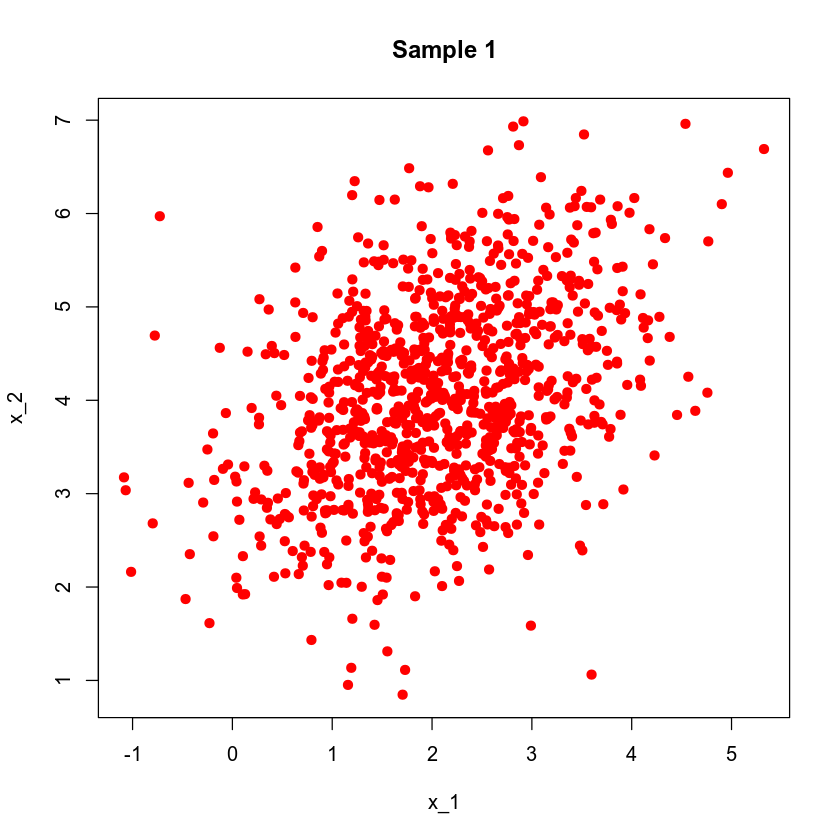

In [4]:
# Plot sample
plot(x_1, pch = 19, col  ='red', xlab = "x_1", ylab = "x_2", main = "Sample 1")

In [5]:
# Create y_1 matrix: 
# nrow(y_matrix) = nrow(x_1)
# Associated with class 0
y_1 <- as.matrix(rep(0, nrow(x_1)))

<font color='blue'>***3.- Repite 2) para otra muestra con N = 1000, mu_x = 6, mu_y = 3, var_x = var_y = 1, y Cov(x,y) = 0.3. Crea una matriz “y2” con tantas filas como la matriz x2 y asígnale el valor 1.***</font>

In [6]:
# Create sample x_2
x_2 <- my_dist(N = 1000, mu_x = 6, mu_y = 3, var_x = 1, var_y = 1, cov_xy = 0.3)

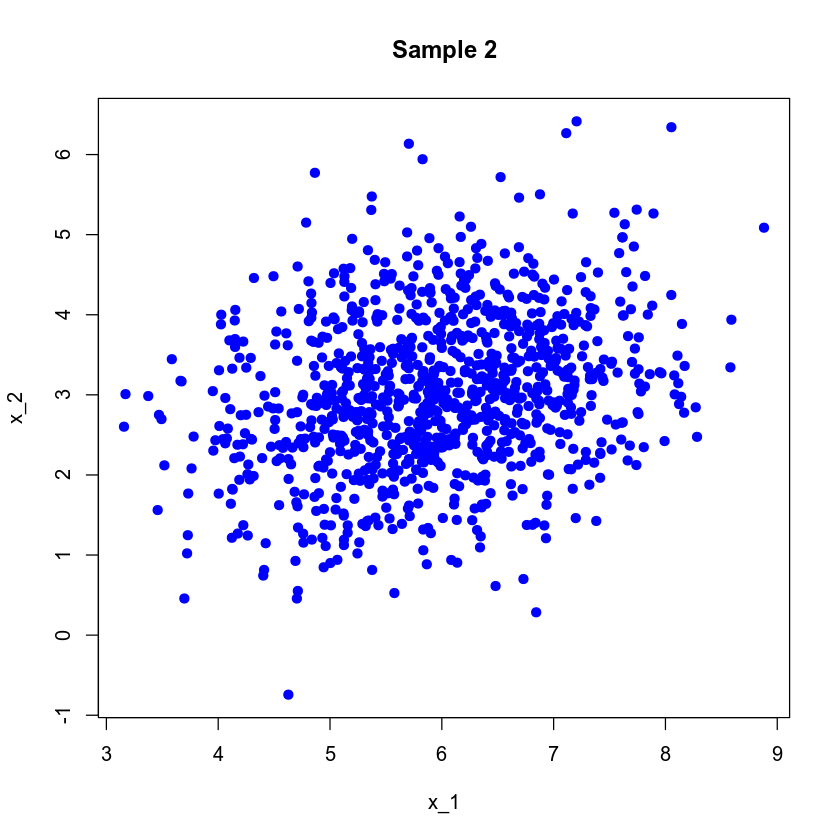

In [7]:
# Plot sample
plot(x_2, pch = 19, col = 'blue', xlab = "x_1", ylab = "x_2", main = "Sample 2")

In [8]:
# Create y_2 matrix: 
# nrow(y_2) = nrow(x_2)
# Associated with class 1
y_2 <- as.matrix(rep(1, nrow(x_2)))

Los valores de los parámetros son:

$$\mu_{1} = \begin{bmatrix}
2 \\
4 \\
\end{bmatrix},$$

$$\mu_{2} = \begin{bmatrix}
6 \\
3 \\
\end{bmatrix},$$

$$Cov_{1} = \begin{bmatrix}
1 & 0.3\\
0.3 & 1\\
\end{bmatrix},$$

$$Cov_{2} = \begin{bmatrix}
1 & 0.3\\
0.3 & 1\\
\end{bmatrix},$$

$$ \boldsymbol{x} = \begin{bmatrix}
x_{1} \\
x_{2} \\
\end{bmatrix}.$$


Por tanto, el modelo que emplearemos será del tipo
$$z = \alpha_{0} + \alpha_{1}x_{1}+ \alpha_{2}x_{2},$$

y nuestro objetivo vuelve a ser encontrar los valores particulares $\boldsymbol{\hat{\alpha}}$ de $\boldsymbol{\alpha}$ que minimicen la función de coste donde $\boldsymbol{\alpha}$ es el vector de coeficientes.

<font color='blue'>***4.-Junta las matrices x1, x2, y y1, y2 en una sola matriz x y una sola matriz y.***</font>

In [9]:
# Combine x_1, x_2. Row binding.
# x_train: sample for training our model
x_train <- rbind(x_1, x_2)

In [10]:
# Combine y_1, y_2. Row binding.
# y_train: observed classes for training
y_train <- rbind(y_1, y_2)

<font color='blue'>***5.- Usando las funciones de coste y gradiente del ejercicio 5, utiliza optim para un modelo en el que z = alpha_0 + alpha_1 x1 + alpha_2 x2, tomando como vector de parámetros inicial el (0, 0, 0). Calcula y pinta la frontera entre ambas distribuciones.***</font> 

La función sigmoide está dada por:
$$ \sigma(z) = \frac{1}{1+e^{-z}}. $$

In [11]:
sigmoid_value <- function(z){
    
    #
    # Calculates sigmoid function value. 
    # This function is vectorized.
    #
    # @description: Calculates sigmoid function value.
    #
    # @param z: float vector. Evaluation points.
    #
    # @return val: float vector. Evaluation result.
    # 
    
    val <- 1 / (1 + exp(-z))
    return(val)
}

La función de coste está dada por:
$$ \textit{Loss} = -\frac{1}{N}\sum_{i=0}^{N}y_{i}\log(\sigma(a+bx_{i})) + (1-y_{i})\log(1-\sigma(a+bx_{i})) $$

In [12]:
loss_value <- function(alpha, x, y){
    
    #
    # Calculates the loss function value for logistic regression.
    # The chosen loss function is the cross-entropy function:  
    # a measure from the field of information theory, 
    # building upon entropy and generally
    # calculating the difference between two probability distributions.
    #
    # @description Loss function value for logistic regression.
    #
    # @param alphas: float vector. Model coefficients (in our case: alpha_0, alpha_1, alpha_2).
    # @param x: float matrix. Feature matrix includings 1's vector.
    # @param y: float vector. Class vector.
    #
    # @return loss: float. loss function value.
    #  
    
    # Calculates first factor.
    sum_1 <- t(y) %*% log(sigmoid_value(x %*% alpha))
    
    # Calculates second factot
    sum_2 <- (1 - t(y)) %*% log(1 - sigmoid_value(x %*% alpha))
    
    # Loss function value
    loss <- (- 1 / nrow(x)) * (sum_1 + sum_2)
    
    return(loss)
}

El gradiente de la función *Loss* está dado por:
$$ \nabla\textit{Loss} = \frac{1}{N}\sum_{i=0}^{N}(\sigma(\boldsymbol{\alpha}^{T}x_{j})-y_{j})x_{j}. $$

In [13]:
loss_gradient <- function(alphas, x, y){
    
    #
    # Loss function gradient. 
    # The chosen loss function is the cross-entropy function:  
    # a measure from the field of information theory, 
    # building upon entropy and generally
    # calculating the difference between two probability distributions.
    #
    # Maximize likelihood function is the same as minimizing cross-entropy.
    # Calculate points where global extreme is reached.
    #
    # @param alphas: float vector. Model coefficients. (in our case: alpha_0, alpha_1, alpha_2)
    # @param x: float matrix Feature matrix includings 1's vector.  
    # @param y: float vector. Class vector.
    #
    # @return alphas_min: float vector. Points where global minimum is reached. Regression coefs
    #
    
    alphas_min <- (1 / nrow(x)) * (t(sigmoid_value(X %*% alphas) - y) %*%  x)
    return(alphas_min)   
}

Sobre la función *optim*, consultar: https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/optim

Básicamente, *optim* requiere las siguientes funciones:

In [14]:
# FUNCTION TO CALCULATE THE LOSS FUNCTION VALUE
#Loss < - function(alpha, x, y) {
     #alpha es el vector de parámetros
     #x es una matriz que contiene a las características (matriz X)
     #y es una matriz que contiene a las variables dependientes (matriz y)
     #return(cost) #un número
#}

In [15]:
# FUNCTION TO CALCULATE THE LOSS FUNCTION GRADIENT
#Gradient < - function(alpha, x, y) {
     #alpha es el vector de parámetros
     #x es una matriz que contiene a las características (matriz X)
     #y es una matriz que contiene a las variables dependientes (matriz y)
     #return(gr) # un vector
#}

y las invocaciones a *optim* serán del tipo:

In [16]:
#optim(par=initial_alpha, x=x, y=y, fn = Loss, gr = Gradient, method=”BFGS”)

donde:
- **par**: initial values for the parameters to be optimized over;
- **fn**: A function to be minimized (or maximized), with first argument the vector of parameters over which minimization is to take place. It should return a scalar result;
- **gr**: A function to return the gradient for the "BFGS", "CG" and "L-BFGS-B" methods. If it is NULL, a finite-difference approximation will be used;
- **method**: The method to be used. See ‘Details’. Can be abbreviated.

In our case, method = "BFGS" where:
- BFGS: Method "BFGS" is a quasi-Newton method (also known as a variable metric algorithm), specifically that published simultaneously in 1970 by Broyden, Fletcher, Goldfarb and Shanno. This uses function values and gradients to build up a picture of the surface to be optimized.

Llamamos a *optim* ya que para encontrar $\boldsymbol{\hat{\alpha}}$ empleamos un proceso iterativo en el que progresivamente nos acercamos al mínimo mediante:
$$\boldsymbol{\alpha_{i+1}} = \boldsymbol{\alpha_{i}} + \lambda\nabla_{\alpha}Loss$$

In [17]:
# Set features matrix (including 1's vector)
X <- cbind(1, x_train) 

In [18]:
# Set initial alpha parameters
initial_alpha <- c(0, 0, 0)

In [19]:
# Invoke optim function
optim_output <- optim(par = initial_alpha,
                      x = X,
                      y = y_train,
                      fn = loss_value,
                      gr = loss_gradient,
                      method = "BFGS")

In [20]:
optim_output

$par
[1] -11.219169   5.136965  -2.537664

$value
[1] 0.02638129

$counts
function gradient 
     100      100 

$convergence
[1] 1

$message
NULL

Sobre los valores de return:
* **par**: the best set of parameters found;
* **value**: the value of `fn` (function to be minimized) corresponding to `par`;
* **counts**: A two-element integer vector giving the number of calls to `fn` and `gr` (a funstion to return the gradient for method) respectively. This excludes those calls needed to compute the Hessian, if requested, and any calls to fn to compute a finite-difference approximation to the gradient;
* **convergence**: in this case 1:     indicates that the iteration limit maxit had been reached;
* **message**:     A character string giving any additional information returned by the optimizer, or NULL.

Para pintar la recta de regresión obtenida para asignar las clases predichas, empleamos que dihca recta verifica:
$$ \sigma(z) = \frac{1}{1+e^{-z}} =0.5 $$
de modo que $z=0$.

Si bien, nuestro modelo es:
$$z = \hat{\alpha_{0}} + \hat{\alpha_{1}}x_{1}+ \hat{\alpha_{2}}x_{2},$$
luego:
$$ x_{2} = -\frac{ \hat{\alpha_{0}} }{ \hat{\alpha_{2}} } - \frac{ \hat{\alpha_{1}} }{ \hat{\alpha_{2}} }x_{1}.$$

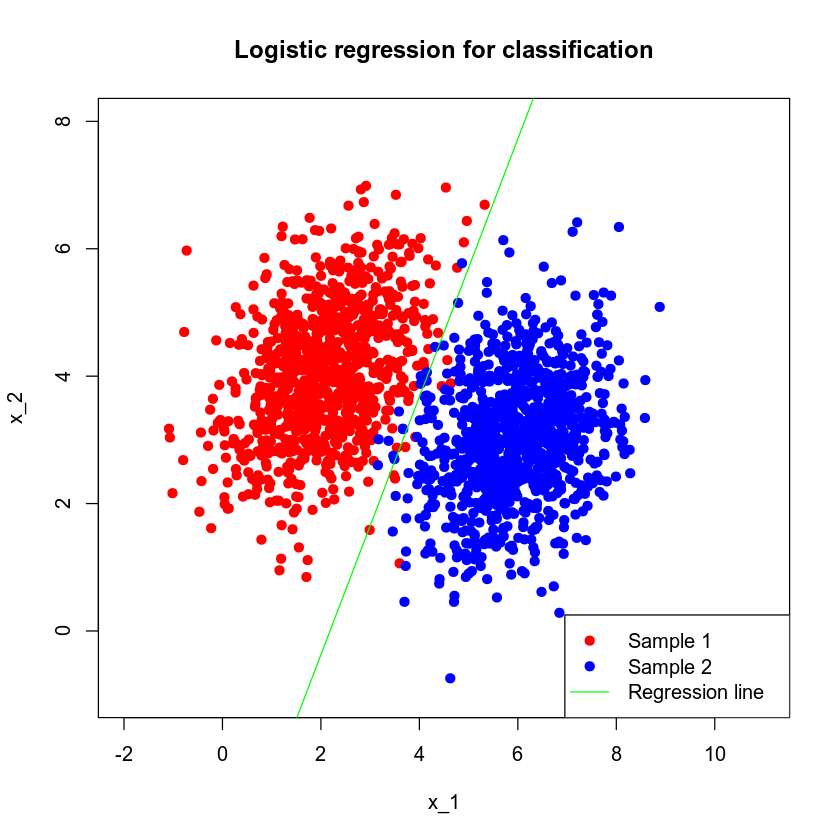

In [21]:
plot(x_1, pch = 19, col = 'red', 
     xlim = c(-2,11), ylim = c(-1, 8),
     xlab = "x_1", ylab = "x_2",
     main = "Logistic regression for classification") # Plot sample 1

points(x_2, pch = 19, col = 'blue') # Plot sample 2

# Plor regression line
abline(a = - optim_output$par[1] / optim_output$par[3], # Intercept
       b = - optim_output$par[2] / optim_output$par[3], # Slope
       col = "green")

legend("bottomright", pch = c(19,19, NA), lty = c(0,0,1),
       c("Sample 1", "Sample 2", "Regression line"), col = c("red", "blue", "green"))

<font color='blue'>***6.- Repite otra vez 1, 2, 3 y 4 para obtener otras matrices x e y independientes. Utilizando la “sigma” calculada anteriormente calcula el TPR, TNR, FPR y FNR para valores del threshold = 0.3, 0.5, 0.7.***</font>  

<font color='green'>**Asumo que en <font color='blue'>*Utilizando la “sigma” calculada anteriormente*</font>, se refiere a que empleemos los valores obtenidos para los coeficientes $\hat{\alpha}$**.</font>  


¿Cómo clasificamos? ¿Qué categoría predecimos ante una observación?
La sigmoide que hemos utilizado con los parámetros que minimizan la función de coste actuará como cmodelo de probabilidad. De este modo, al evaluar dicha sigmoide en un punto:
$$ \sigma(\boldsymbol{x}) = \frac{1}{1+e^{-\hat{\alpha_{0}} + \hat{\alpha_{1}}x_{1} + \hat{\alpha_{2}}x_{2}}}$$
obtendremos cierto valor. Estableceremos cierto umbral, llamémoslo $p$, y la manera de clasificar consistirá en asignar una probabilidad a cada categoría.

En este caso, cuando cierto punto $\boldsymbol{x}$ nos devuelve $P(\boldsymbol{x}) = \sigma(\boldsymbol{x}) \geq p$ lo consideremos de la categoría 1. En caso contrario, lo consideramos de la categoría 0. Recordemos que la sigmoide devuelve valores en [0,1].

Emplearemos la matriz de contingencia vista en clase para calcular:
* TPR: true positive rate;
* FPR: false positive rate;
* FNR: false negative rate;
* TNR: true negative rate.

In [22]:
# GENERATE NEW SAMPLE

# Create sample x_1_2
x_1_2 <- my_dist(N = 100, mu_x = 2, mu_y = 4, var_x = 1, var_y = 1, cov_xy = 0.3)
# Create y_1_2 matrix. Associated with class 0
y_1_2 <- as.matrix(rep(0, nrow(x_1)))

# Create sample x_2_2
x_2 <- my_dist(N = 1000, mu_x = 6, mu_y = 3, var_x = 1, var_y = 1, cov_xy = 0.3)
# Create y_2_2 matrix. Associated with class 1
y_2 <- as.matrix(rep(1, nrow(x_2)))

# Combine. Row binding
x_test <- rbind(x_1, x_2)
y_test <- rbind(y_1, y_2)

In [23]:
if (!require("crayon")) install.packages("crayon")
library('crayon')

Loading required package: crayon


In [24]:
confusion_matrix_rates <- function(alphas, X, y_test, threshold){
    
    #
    # @desciption Create confusion matrix and compute true/false positive rate,
    # true/ false negative rate. 
    #
    # @param alphas: float vector. Vector of coefficients
    # @param X: float matrx. Feature matrix including 1's vector
    # @param y_test: int vector in {0,1}. Obsrved classes
    # @param: threshold: float. Probability threshold for classification.
    #
    # @return: float vector in [0,1] that contains true positive rate at index 1; true negative rate at index 2;
    # false positive rate at index 3; false negative rate at index 4.
    #
    
    
    cat(bold(red(paste("Confusion matrix and rates for threshold", threshold))))
    cat("\n")
    
    # Predict accordind to threshold
    y_pred <- ifelse(data.frame('sigmoid_value' = sigmoid_value(X %*% alphas)) < threshold, 0, 1)
    
    # Confusion matrix
    conf_mat <- table(y_pred, y_test)
    print(conf_mat)
    
    # Matirx entries
    tp <- conf_mat[1,1]   # True  positive
    fp <- conf_mat[1,2]   # False positive
    fn <- conf_mat[2,1]   # False negative
    tn <- conf_mat[2,2]   # True  negative
    
    # Calculate rates
    tpr <- tp / (tp + fn) # True  positive rate
    tnr <- tn / (fp + tn) # True  negative rate
    fpr <- fp / (fp + tn) # False positive rate
    fnr <- fn / (tp + fn) # False negative rate
    
    # Display results
    cat("\n")
    print(sprintf("True  Positive Rate %f", tpr))
    print(sprintf("True  Negative Rate %f", tnr)) 
    print(sprintf("False Positive Rate %f", fpr)) 
    print(sprintf("False Negative Rate %f", fnr))
    cat("\n")
    
    return(c(tpr, tnr, fpr, fnr))
}

In [25]:
# Set features matrix (including 1's vector)
X <- cbind(1, x_test)

In [26]:
# Values for threshold 
threshold = seq(from = 0.3, to = 0.9, by = 0.2)

# Vector to keep and plot results
tpr_vec <- c()
tnr_vec <- c()
fpr_vec <- c()
fnr_vec <- c()

for (item in threshold){
    rates <- confusion_matrix_rates(optim_output$par, X, y_test, item)
    tpr_vec <- c(tpr_vec, rates[1])
    tnr_vec <- c(tnr_vec, rates[2])
    fpr_vec <- c(fpr_vec, rates[3])
    fnr_vec <- c(fnr_vec, rates[4])
}

Confusion matrix and rates for threshold 0.3
      y_test
y_pred   0   1
     0 985   8
     1  15 992

[1] "True  Positive Rate 0.985000"
[1] "True  Negative Rate 0.992000"
[1] "False Positive Rate 0.008000"
[1] "False Negative Rate 0.015000"

Confusion matrix and rates for threshold 0.5
      y_test
y_pred   0   1
     0 989   8
     1  11 992

[1] "True  Positive Rate 0.989000"
[1] "True  Negative Rate 0.992000"
[1] "False Positive Rate 0.008000"
[1] "False Negative Rate 0.011000"

Confusion matrix and rates for threshold 0.7
      y_test
y_pred   0   1
     0 993  15
     1   7 985

[1] "True  Positive Rate 0.993000"
[1] "True  Negative Rate 0.985000"
[1] "False Positive Rate 0.015000"
[1] "False Negative Rate 0.007000"

Confusion matrix and rates for threshold 0.9
      y_test
y_pred   0   1
     0 997  25
     1   3 975

[1] "True  Positive Rate 0.997000"
[1] "True  Negative Rate 0.975000"
[1] "False Positive Rate 0.025000"
[1] "False Negative Rate 0.003000"



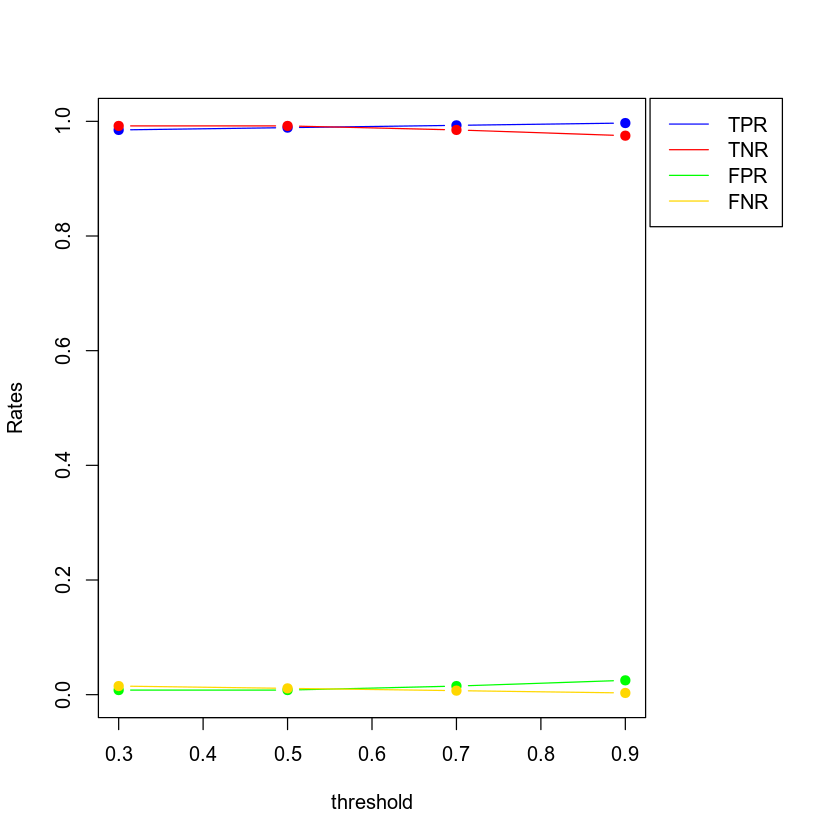

In [27]:
par(mar = c(5.1, 4.1, 4.1, 8.1), xpd = TRUE)
plot(  tpr_vec ~ threshold, col = 'blue',  pch = 19, type = "b", ylim = c(0, 1), ylab = "Rates",) # Plot tpr
points(tnr_vec ~ threshold, col = 'red',   pch = 19, type = "b")                                  # Plot tnr
points(fpr_vec ~ threshold, col = 'green', pch = 19, type = "b")                                  # Plot fpr
points(fnr_vec ~ threshold, col = 'gold',  pch = 19, type = "b")                                  # Plot fnr
legend("topright", inset = c(-0.25,0), lty = 1,
       c("TPR", "TNR", "FPR", "FNR"), col = c("blue", "red", "green", "gold"))

Recordemos que, dado un umbral $p$, decimos que un punto $\boldsymbol{x}$ pertenece a la clase 0 si su probabilidad verifica $P(\boldsymbol{x}) < p $; y decimos que pertenece a la clase 1 en caso contrario.

A partir de la gráfica, vemos que la TPR aumenta ligeramente según aumenta el umbral mientras que la TNR decrece ligeramente. Esto se debe al criterio de clasicicación, según aumentamos el umbral, más dificil es que la probabilidad de un punto supere dicho umbral y por tanto sea clasificado como clase 1 (por ello decrece la TNR). Del mismo modo, se hace más fácil tener una probabilidad inferior al umbral, por ello crece la TPR.

La FPR aumenta ligeramente y la FNR decrece ligeramete por el mismo motivo explicado anteriormente. 